In [1]:
%matplotlib inline 
import sys, os
base_path = os.getcwd()[0:os.getcwd().rfind('Watermark')] + "Watermark/"
sys.path.append(base_path) 

import matplotlib.pyplot as plt
from src.asiaccs_main import asiaccs_whitebox
from src.models import get_deep_cnn_for_cifar, get_lenet_model_for_mnist
from src.preprocess_data import load_cifar_images, load_mnist_images

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Description
In this notebook we are running a surrogate model attack. The attacker and owner data is disjoint.

In [ ]:
surr_model, all_history = asiaccs_whitebox(
     load_dataset_func=load_cifar_images,
     dataset_label="CIFAR",
     load_wm_model_func=get_deep_cnn_for_cifar,
     wm_type="logo",
     owner_data_size=25000,
     total_owner_data_size=100000,
     key_length=10000,
     key_length_test=1000,
     attacker_data_size=25000,
     total_attacker_data_size=100000,
     attacker_data_size_reg=3000,
     epochs_embed=20,
     epochs_reg=30,
     epochs_surr=15,
     freeze_first_layers=0,
     early_stopping_wm_reg=0.1,  
     lr_surr=0.001,  
     reg_whitebox=0.003,
     reg_surr=0,
     batchsize_reg=64,
     batchsize_surr=64,
     cache_embed_wm="asiaccs_logo_cifar",
     cache_reg_model=None,
     cache_surr_model=None,
     verbose=True
)

[1/6] ASIACCS (logo) Whitebox Attack: Loading CIFAR data
      Owner data: 100000 Attacker Data: 100000
     Found cached training data for owner_data100000100000
     Found cached training data for attacker_data100000100000
[2/6] Generating ASIACCS watermarked images: Train(10000) Test(1000)
Embedding logo watermarks


dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'watermark_new_loss', 'watermark_new_val', 'watermark_loss', 'watermark_val', 'time', 'time_total'])


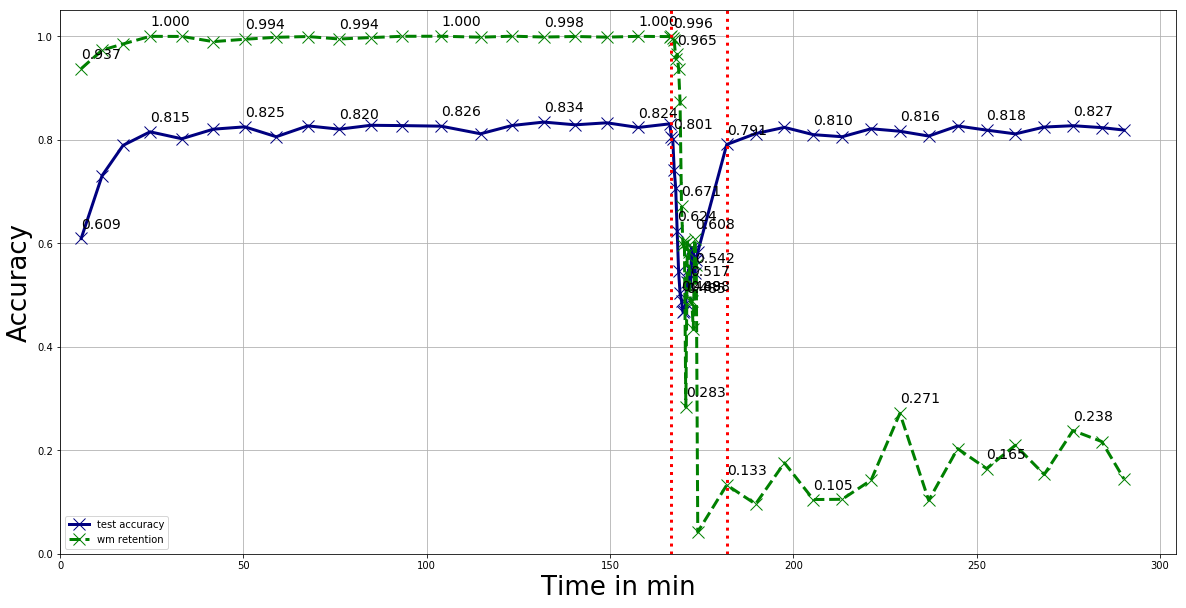

In [5]:
embed_history, reg_history, surr_history = all_history
for history in all_history:
    print(history.history.keys())

plt.figure(figsize=(20,10))
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'font.size': 16}
test_acc_color = "navy"
linestyle_test_acc = "x-"
linestyle_watermark = "x--"
watermark_ret_color = "green"
watermark_ret_color2 = "green"
linewidth = 3.0
markersize = 12

# Merge all times
time_arr = embed_history.history['time']
x_axis_time = []
for i in range(0, len(time_arr)):
    t = time_arr[i]
    for j in range(0,i):
        t += time_arr[j]
    x_axis_time.append(t/60)
offset = x_axis_time[-1]
time_arr2 = reg_history.history['time']
for i in range(0, len(time_arr2)):
    t = time_arr2[i]
    for j in range(0,i):
        t += time_arr2[j]
    x_axis_time.append(t/60+offset)
offset2 = x_axis_time[-1]
time_arr3 = surr_history.history['time']
for i in range(0, len(time_arr3)):
    t = time_arr3[i]
    for j in range(0,i):
        t += time_arr3[j]
    x_axis_time.append(t/60+offset2)

# Merge all values
y_axis_acc = embed_history.history['val_acc'] + reg_history.history['val_acc'] + surr_history.history['val_acc']
y_axis_wm = embed_history.history['watermark_val'] + reg_history.history['watermark_val'] + surr_history.history['watermark_val']
    
plt.xlabel('Time in min', fontsize=26)
plt.ylabel('Accuracy', fontsize=26)

lh1, lh2, lh3 = len(embed_history.history['val_acc']), len(reg_history.history['val_acc']), len(surr_history.history['val_acc'])

plt.plot(x_axis_time, y_axis_acc, linestyle_test_acc, linewidth=linewidth, markersize=markersize, color=test_acc_color)
plt.plot(x_axis_time, y_axis_wm, linestyle_watermark, linewidth=linewidth, markersize=markersize, color=watermark_ret_color2)

plt.axvline(x_axis_time[lh1], linestyle=':', linewidth=linewidth, color='red')
plt.axvline(x_axis_time[lh1+lh2], linestyle=':', linewidth=linewidth, color='red')

# Annotate accuracy data points
dat_y = y_axis_acc
dat_x = x_axis_time
ctr = 0
for xy in zip(dat_x, dat_y):    
    if ctr % 3 == 0 or ctr == len(dat_y):
        plt.annotate("{:.3f}".format(xy[1]), xy=(xy[0], xy[1]+0.02), textcoords='data', fontsize=14) # <--  
    ctr += 1
    
# Annotate wm data points
dat_y = y_axis_wm
dat_x = x_axis_time
ctr = 0
for xy in zip(dat_x, dat_y):    
    if ctr % 3 == 0 or ctr == len(dat_y):
        plt.annotate("{:.3f}".format(xy[1]), xy=(xy[0], xy[1]+0.02), textcoords='data', fontsize=14) # <--  
    ctr += 1

plt.ylim(0,1.05)
plt.xlim(0)

plt.grid()

plt.legend(['test accuracy', 'wm retention'], loc='lower left')
plt.show()